## Content

* [Stage 4. Exploratory Data Analysis (Python)](#stage4)
    * [Importing Dataset](#import)
    * [Studying Data Contents](#studying)
    * [Creating Graphics](#graphics)
    * [Conclusion](#conclusion)
* [Stage 5. Testing Hypotheses (Python)](#stage5)
    * [Formulating Hypotheses](#formulate)
    * [Conclusion](#conclusion2)

## Stage 4. Exploratory Data Analysis (Python) <a id='stage4'></a>

In this stage, we continue our previous task. If the previous task used SQL to process the data and saved the results in CSV format, this time we will use Python to visualize and test hypotheses from the dataset that has been processed using SQL.

**Questions:**
- Which libraries will be used? (Pandas, Seaborn, Matplotlib, SciPy)
- What is the purpose of Stage 4? (to see which regions and companies have the most trips)

**Key Tasks:**
- [ ] Importing the dataset.
- [ ] Checking general information of the dataset.
- [ ] Checking data types.
- [ ] Finding the top 10 companies.
- [ ] Viewing the regions with the most taxi trips.

### Importing Dataset <a id='import'></a>


In [1]:
# Import libraries for data manipulation
import pandas as pd

In [2]:
# Import both datasets
first_data = pd.read_csv('https://raw.githubusercontent.com/milawidyalestari/data-analyst-ml-project/project6-zuber-competitor-analyze/moved_project_sql_result_01.csv')
second_data = pd.read_csv('https://raw.githubusercontent.com/milawidyalestari/data-analyst-ml-project/project6-zuber-competitor-analyze/moved_project_sql_result_04.csv')

### Studying Data Contents <a id='mempelajari'></a>


In [3]:
# View general information on the first dataset
first_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# View general information on the second dataset
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


There are 2 columns in each dataset, where the data types of each column are already correct. So we will continue to use this dataset without changing the data type of each column of the dataset.

In [5]:
# View the top 10 taxi companies
top_taxi_company = first_data.sort_values(by= 'trips_amount', ascending= False)[: 10]
top_taxi_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [6]:
# View the top 10 regions based on the number of trips
top_dropoff = second_data.sort_values(by= 'average_trips', ascending= False)[: 10]
top_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Creating Graphics <a id='graphics'></a>


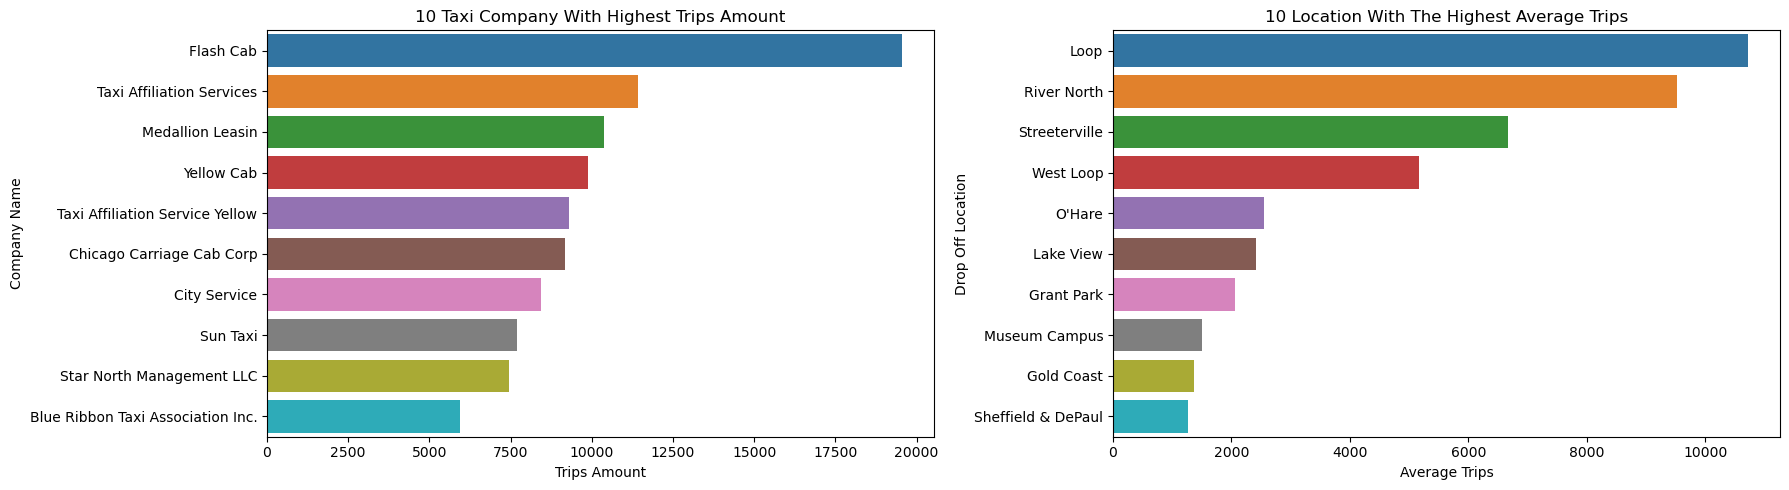

In [7]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create a graph for the top 10 taxi companies with the most trips
plt.figure(figsize= (18,5))
plt.subplot(1,2,1)
sns.barplot(data= top_taxi_company, x= 'trips_amount', y = 'company_name')
plt.ylabel('Company Name')
plt.xlabel('Trips Amount')
plt.title('10 Taxi Company With Highest Trips Amount')

# Create a graph for the top 10 regions with the most trips
plt.subplot(1,2,2)
sns.barplot(data= top_dropoff, x= 'average_trips', y = 'dropoff_location_name')
plt.ylabel('Drop Off Location')
plt.xlabel('Average Trips')
plt.title('10 Location With The Highest Average Trips')
plt.tight_layout()
plt.show()

### Conclusion <a id='conclusion'></a>

- The top three companies that are Zuber's strongest competitors are Flash Cab, Taxi Affiliation Services, and Medallion Leasing.
- The regions that use taxis the most are Loop, River North, and Streeterville.

So the conclusion we can draw from the above visualizations is that the most taxi users are in Loop, River North, and Streeterville. Where if we can dominate these three areas, then our company can reach more than 50% of customers in all areas.

**Checklisted Tasks:**
- [x] Importing the dataset.
- [x] Checking general information of the dataset.
- [x] Checking data types.
- [x] Finding the top 10 companies.
- [x] Viewing the regions with the most taxi trips.

## Stage 5. Testing Hypotheses (Python) <a id='stage5'></a>

In stage 4, we have visualized the results from both datasets queried in stages 1-3. Now in stage 5, we will test the hypothesis `"The average travel duration from Loop to O'Hare International Airport changes when it rains on Saturdays."`

Dataset to be used: `'/datasets/project_sql_result_07.csv'`

**Key Tasks:**
- [ ] Import libraries.
- [ ] Formulate null hypothesis.
- [ ] Formulate alternative hypothesis.
- [ ] Test the hypothesis.

In [8]:
# Import the SciPy library
from scipy.stats import ttest_ind

In [9]:
# Import dataset
third_data = pd.read_csv('https://raw.githubusercontent.com/milawidyalestari/data-analyst-ml-project/project6-zuber-competitor-analyze/moved_project_sql_result_07.csv')
third_data

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


Before testing the hypothesis on this dataset, it is advisable to first explore the dataset to determine the presence or absence of outliers in the dataset.

In [10]:
# Explore the dataset further
third_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
# View the proportion in the weather_condition column
third_data['weather_conditions'].value_counts()

weather_conditions
Good    888
Bad     180
Name: count, dtype: int64

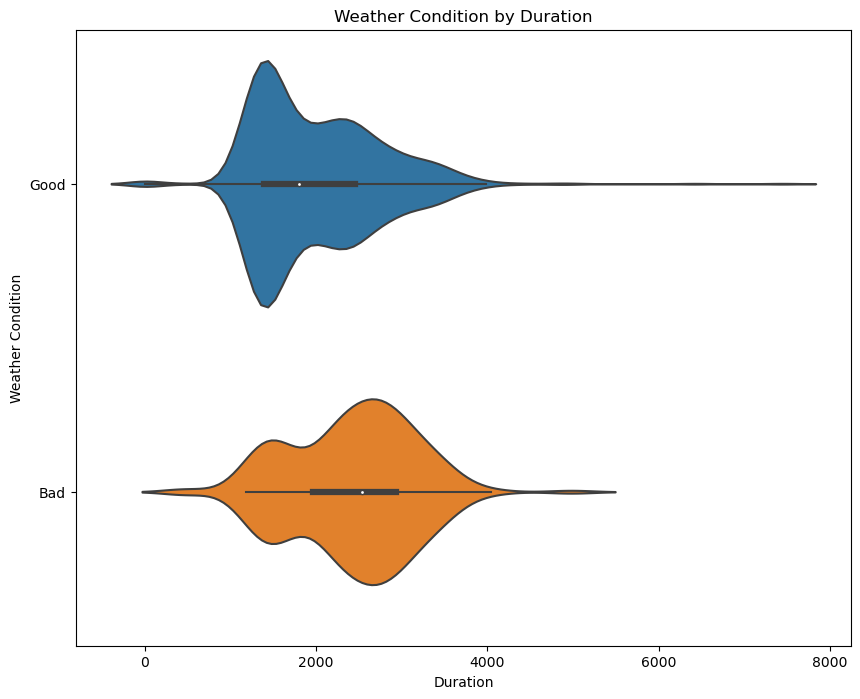

In [12]:
# Visualize the weather_condition column against duration_seconds
plt.figure(figsize= (10,8))
sns.violinplot(data= third_data, x= 'duration_seconds', y= 'weather_conditions')
plt.xlabel('Duration')
plt.ylabel('Weather Condition')
plt.title('Weather Condition by Duration')
plt.show()

**Findings:**
In the general information above, there are data types that are not appropriate, and in the violin plot above, there are outlier values in both weather conditions. before testing statistics on this dataset, it is better if these outlier values are removed from the dataset.

**Key Tasks:**
- [ ] Change data type.
- [ ] Remove outlier values.
- [ ] Formulate null hypothesis.
- [ ] Formulate alternative hypothesis.
- [ ] Test the hypothesis.

**Checklisted Tasks:**
- [x] Import libraries

In [13]:
# Change the data type
third_data['start_ts'] = pd.to_datetime(third_data['start_ts'])

# Remove outlier values in the weather condition column
# Split the data into good and bad data
good_data = third_data.loc[third_data['weather_conditions']== 'Good']
bad_data = third_data.loc[third_data['weather_conditions']== 'Bad']

In [14]:
# Duplicate the data
good_df = good_data.copy()
bad_df = bad_data.copy()

In [15]:
# Create a function that removes outlier values
def remove_outliers(dataframe, col):
    # mencari iqr
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3 - q1

    # Find the upper and lower bounds
    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr

    dataframe = dataframe.loc[(dataframe[col] > lower_lim) & (dataframe[col] < upper_lim)]

    return dataframe

In [16]:
# Remove outlier values
clean_good_data = remove_outliers(dataframe= good_data, col= 'duration_seconds')
clean_bad_data = remove_outliers(dataframe= bad_data, col= 'duration_seconds')

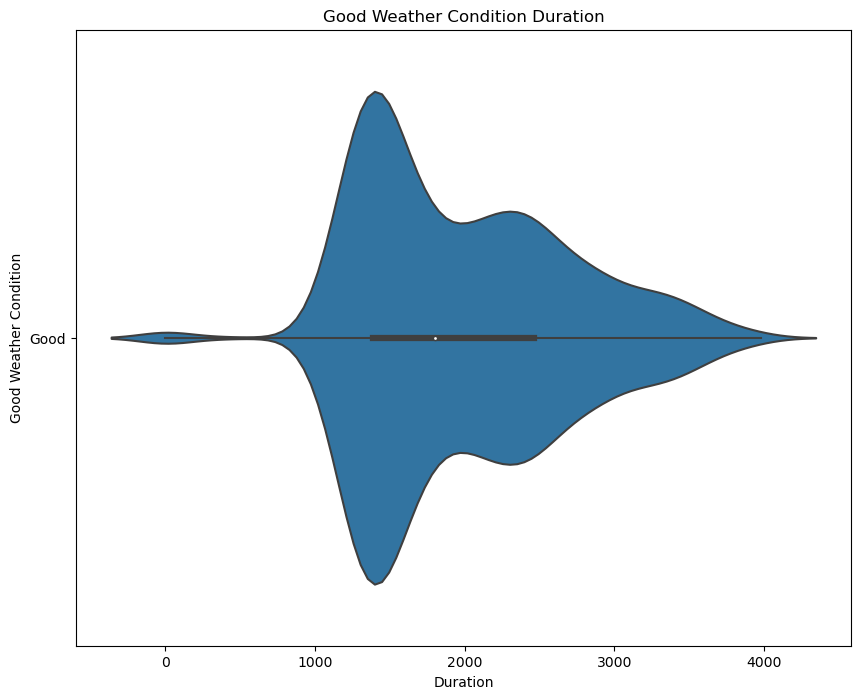

In [17]:
# Check the dataframe values again
plt.figure(figsize= (10,8))
sns.violinplot(data= clean_good_data, x= 'duration_seconds', y= 'weather_conditions')
plt.xlabel('Duration')
plt.ylabel('Good Weather Condition')
plt.title('Good Weather Condition Duration')
plt.show()

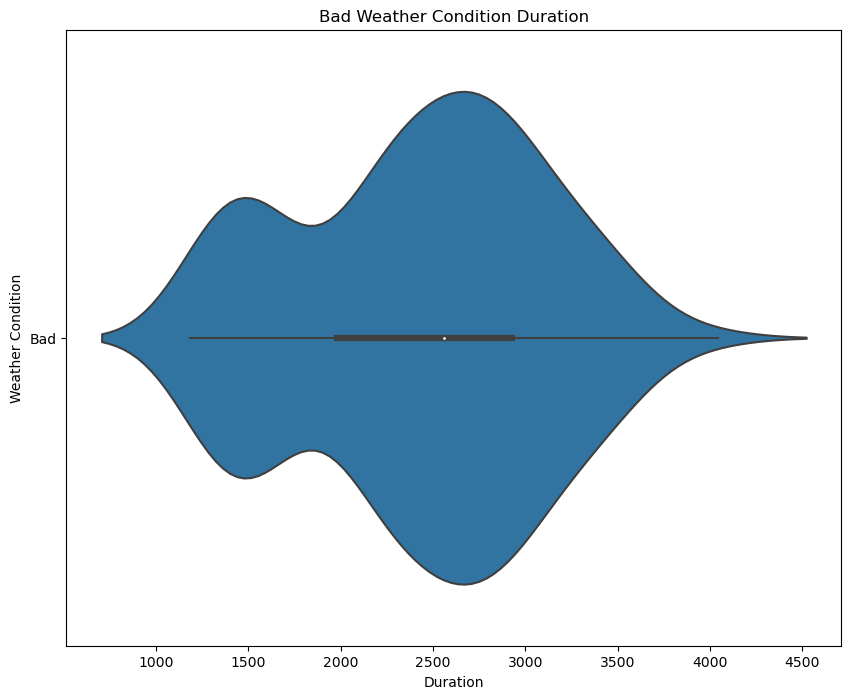

In [18]:
# Check the dataframe values again
plt.figure(figsize= (10,8))
sns.violinplot(data= clean_bad_data, x= 'duration_seconds', y= 'weather_conditions')
plt.xlabel('Duration')
plt.ylabel('Weather Condition')
plt.title('Bad Weather Condition Duration')
plt.show()

### Formulating Hypotheses <a id='formulate'></a>

- **Null Hypothesis (H₀):** `'The average travel duration from Loop to O'Hare International Airport changes when it rains on Saturdays.'`

- **Alternative Hypothesis (H₁):** `'The average travel duration from Loop to O'Hare International Airport is the same as other days when it rains.'`

In [19]:
# Import library for statistical tests
from scipy.stats import ttest_ind, mannwhitneyu

In [20]:
# Test hypothesis
pvalue = mannwhitneyu(clean_bad_data['duration_seconds'], clean_good_data['duration_seconds']).pvalue

alpha = 0.05

if pvalue < alpha:
    print('The average travel duration from Loop to O`Hare International Airport **changes** when it rains on Saturdays')
else:
    print('The average travel duration from Loop to O`Hare International Airport **is the same** as other days when it rains')

The average travel duration from Loop to O`Hare International Airport **changes** when it rains on Saturdays


In [21]:
# Prove the hypothesis above
print('Average travel time during normal weather:', clean_good_data['duration_seconds'].mean())
print('Average travel time during rainy weather:', clean_bad_data['duration_seconds'].mean())

Average travel time during normal weather: 1976.8163265306123
Average travel time during rainy weather: 2434.785310734463


### Conclusion <a id='conclusion2'></a>

So we conclude that indeed the average travel duration to the airport on Saturdays changes when it rains. It could be because that day is the weekend when traffic jams can occur, coupled with rain which makes taxis have to be driven slowly.

One interesting thing from testing this hypothesis is that our company could create a taxi program that is faster and safer when going to the airport in rainy or sunny weather.

**Checklisted Tasks:**
- [x] Change data type
- [x] Remove outlier values
- [x] Formulate null hypothesis
- [x] Formulate alternative hypothesis
- [x] Test the hypothesis